In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from mpl_toolkits import mplot3d
import librosa
%matplotlib inline

# Complexity Metric Guide

### Frequency Mean
Mean frequency over frequency spectra after Fourier transformation to frequency domain.
### Frequency Variance
Variance of frequency over frequency spectrum after Fourier transformation to frequency domain.
### Shannon Entropy
Normalized implementation of Shannon Entropy in bits/second.
### PCA Total Explained Variance
Sum of explained variance of 25 principal components of each track. Number of principal components selected using stratification method to center total explained variance mean at ~80%. Hypothesis: lower explained variance values are more complex.
### Kolmogorov Entropy
Normalized EntropyHub metric estimating entropy, and used to explore randomness/chaotic nature of systems. Sometimes denoted Kolmogorov-Sinai entropy or algorithmic entropy.
### Multiscale Entropy
Normalized EntropyHub metric measuring Shannon Entropy through iterative down-sampling of the series, in order to capture entropies of different resolutions. Produces an entropy curve from which MSE Complexity Index is calculated.
### Multiscale Entropy Complexity Index
Normalized integral of MS Entropy curve to represent complexity measured from many different sample-sizes of tracks.
### Spectral Centroids
Known as "center of mass" of signal over defined hop length. Centroid mean is highly correlated with frequency variance.

In [3]:
with open("metrics_norm", "rb") as f:
    library = pickle.load(f)
library

,Artist,Album,Track,Frequency Mean,Frequency Variance,Shannon Entropy,PCA Total Explained Variance,Kolmogorov Entropy,Multiscale Entropy,MSE Complexity Index,Spectral Centroids
0,A Boogie Wit da Hoodie,Artist 2.0,Blood On My Denim.flac,66.920875,15970.263672,0.628493,0.790139,0.298364,"[0.1538493814328648, 0.16048934105725068, 0.14...",0.417731,"[[614.7219247907714, 580.9789190137599, 552.86..."
1,A Boogie Wit da Hoodie,Artist 2.0,Cinderella Story.flac,55.728783,17386.798828,0.617328,0.756537,0.358624,"[0.20434774845918355, 0.24669944938371957, 0.2...",0.785896,"[[657.286658731631, 651.5876537622278, 691.854..."
2,A Boogie Wit da Hoodie,Artist 2.0,DTB 4 Life.flac,66.843576,32000.968750,0.605656,0.762500,0.336338,"[0.17370892993655546, 0.20412925531456913, 0.1...",0.495781,"[[1129.3520934303833, 1108.7669279087688, 1024..."
3,A Boogie Wit da Hoodie,Artist 2.0,Good Girls Gone Bad.flac,54.500885,10451.988281,0.511166,0.789075,0.470926,"[0.07492532180033032, 0.09316728030148863, 0.1...",0.286822,"[[1209.9259374856615, 1168.892595336179, 1118...."
4,A Boogie Wit da Hoodie,Artist 2.0,Me and My Guitar.flac,67.206950,18701.509766,0.590577,0.763222,0.319907,"[0.16906742415054185, 0.21795609506323063, 0.2...",0.605726,"[[668.4409800828082, 594.9065538847723, 389.53..."
...,...,...,...,...,...,...,...,...,...,...,...
694,"Young Thug, Future",Beautiful Thugger Girls,Relationship (feat. Future).flac,83.846650,47899.312500,0.644137,0.744157,0.231056,"[0.19155731093341485, 0.2533987469385666, 0.27...",0.780428,"[[1677.4724994167557, 1564.1368411936178, 1691..."
695,"Young Thug, Gunna",Beautiful Thugger Girls,Tomorrow 'Til Infinity (feat. Gunna).flac,82.883001,42679.359375,0.656041,0.757953,0.216076,"[0.19436226258465916, 0.23406207329537523, 0.2...",0.699515,"[[1725.7629509713877, 605.4004844774225, 577.2..."
696,"Young Thug, Jacquees",Beautiful Thugger Girls,For Y'all (feat. Jacquees).flac,86.242690,36486.082031,0.648645,0.737402,0.282472,"[0.22744520357697035, 0.24893027151913552, 0.2...",0.693501,"[[1578.7607895067422, 542.0586795647416, 487.3..."
697,"Young Thug, Lil Durk, Snoop Dogg",Beautiful Thugger Girls,Get High (feat. Snoop Dogg & Lil Durk).flac,90.848220,68468.804688,0.702563,0.770472,0.298364,"[0.1342259474167293, 0.17162166788160416, 0.19...",0.551623,"[[1407.171894480627, 379.83649893089455, 461.8..."


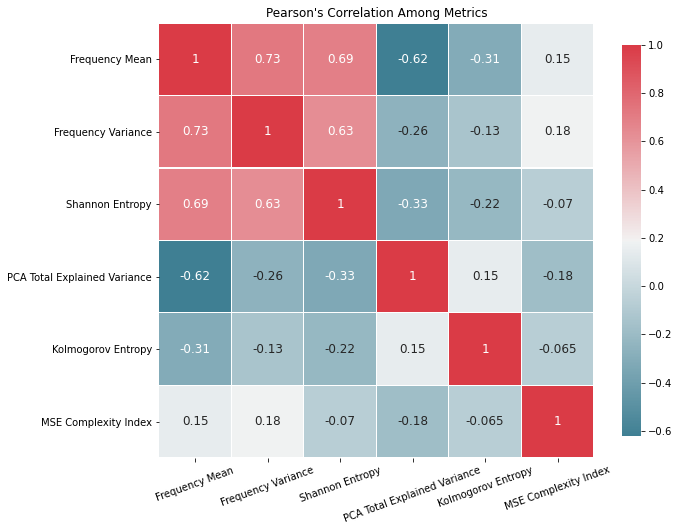

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
        library.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }),
plt.xticks(rotation = 20)
plt.title("Pearson's Correlation Among Metrics")
plt.show()

#### Note the lack of correlation between Shannon Entropy, PCA TEV, and the EntropyHub metrics, especially Multiscale Entropy, which is an extension of Shannon Entropy. There is some correlation between Shannon Entropy and Frequency Mean and Variance. Intuitively, Shannon Entropy measures bits of information, so this correlation isn't surprising: higher mean frequency and greater variance could imply more bandwidth per second.

#### Let's look at the distributions of each metric. They are mostly normal, with some skewing in Frequency Variance and Kolmogorov Entropy.

Text(0.5, 1.0, 'MSE Ci')

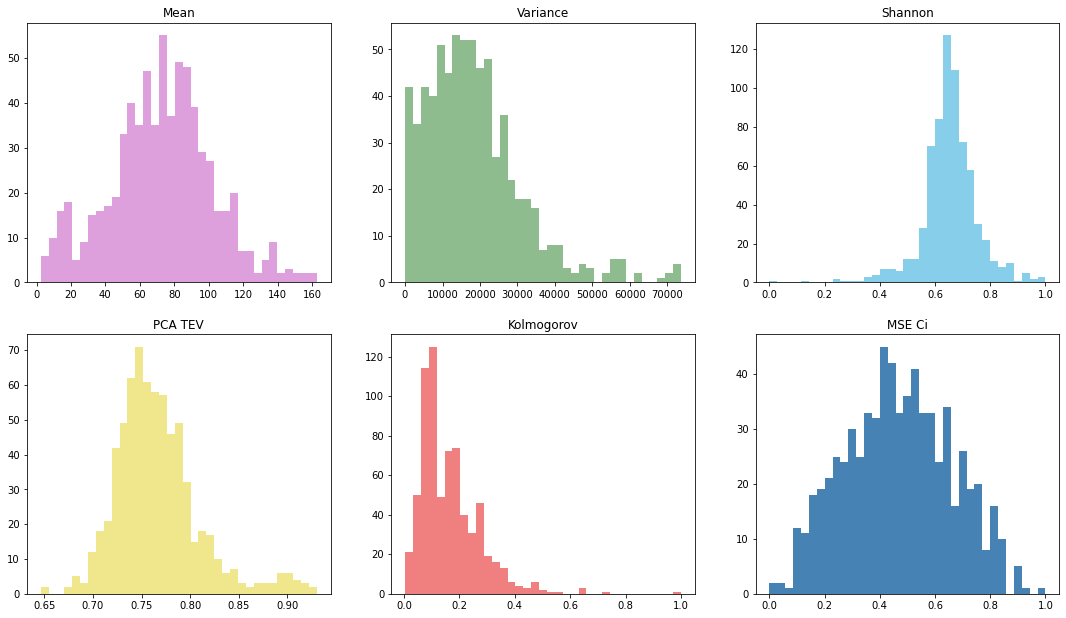

In [5]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)
axs[0,0].hist(library["Frequency Mean"], bins = 35, color = "plum")
axs[0,0].set_title("Mean")
axs[0,1].hist(library["Frequency Variance"], bins = 35, color = "darkseagreen")
axs[0,1].set_title("Variance")
axs[0,2].hist(library["Shannon Entropy"], bins = 35, color = "skyblue")
axs[0,2].set_title("Shannon")
axs[1,0].hist(library["PCA Total Explained Variance"], bins = 35, color = "khaki")
axs[1,0].set_title("PCA TEV")
axs[1,1].hist(library["Kolmogorov Entropy"], bins = 35, color = "lightcoral")
axs[1,1].set_title("Kolmogorov")
axs[1,2].hist(library["MSE Complexity Index"], bins = 35, color = "steelblue")
axs[1,2].set_title("MSE Ci")

#### Here we have the PCA Total Explained Variance in a scatter plot, for example. The blue line is the mean, the red lines are one standard deviation, and the greens are two standard deviations from the mean.

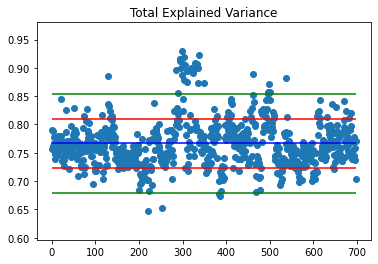

In [6]:
data = library["PCA Total Explained Variance"]
mean = library["PCA Total Explained Variance"].mean()
std = library["PCA Total Explained Variance"].std()
min_value = min(data)
max_value = max(data)

plt.title("Total Explained Variance")
plt.ylim(min_value - 0.05, max_value + 0.05)
plt.scatter(x=library.index, y=data)
plt.hlines(y=mean, xmin=0, xmax=len(data), color = 'b')
plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')

#### Below we create a function that receives the metric to be studied, the metadata category (artist, album, track) and "num" number of songs to be measured. We then plot the top and bottom "num" songs for that metric and display their chosen category. That is, we're going to take a look at the tails of those distributions above. We will select 15 tracks at each tail as those approximate the top and bottom 2+% of the distribution, or approximately greater than 2 standard deviations from the mean.

In [7]:
def tailPlot(metric, cat, num):
    count = num
    fig = plt.figure(figsize=(12,8))
    sorts=library.sort_values(by=[metric])
    top = sorts.head(count)
    bot = sorts.tail(count)
    frames=[top,bot]
    together=pd.concat(frames)
    ax = sns.barplot(x=metric, y=cat, data=together)

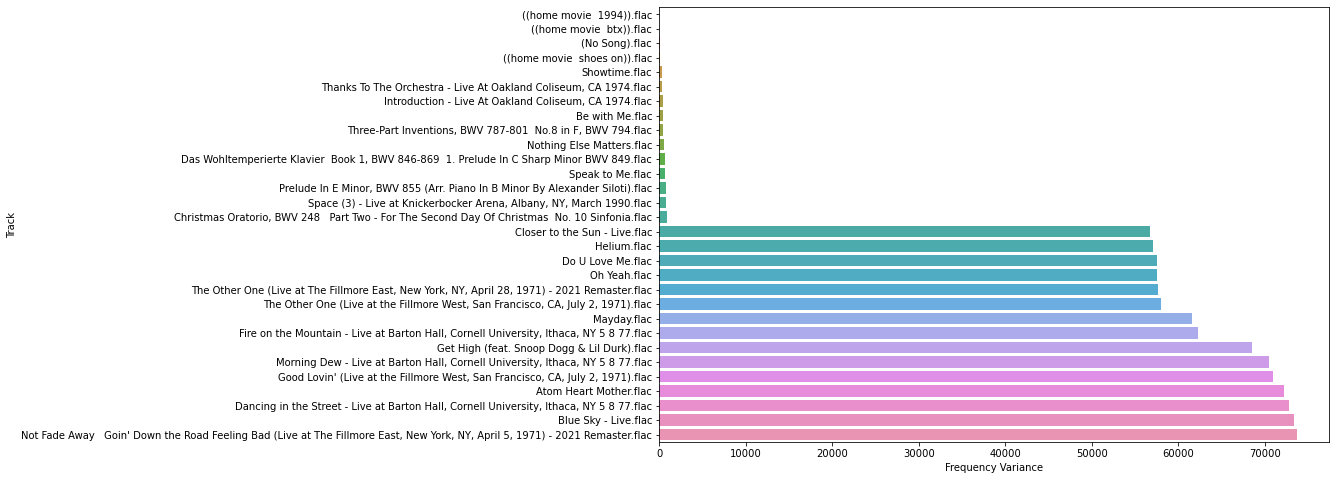

In [8]:
tailPlot("Frequency Variance","Track", 15)

#### Let's construct a plot to look at the artists associated with these tracks.

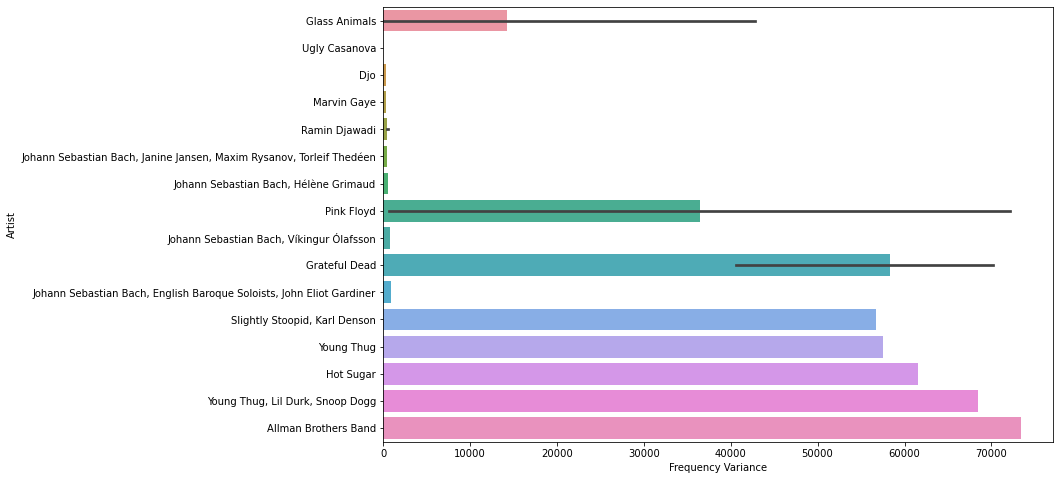

In [9]:
tailPlot("Frequency Variance","Artist", 15)

#### The bottom artists have a greater frequency variance while the top artists have a lesser frequency variance. Pink Floyd, Grateful Dead, and Glass Animals have multiple songs within those original 30. The black lines represent the ranges of those multiple songs. Frequency variance and mean should not necessarily be representative of complexity, regardless of their potential correlation.

#### Now we will examine the highest and lowest 15 tracks with respect to Shannon Entropy:

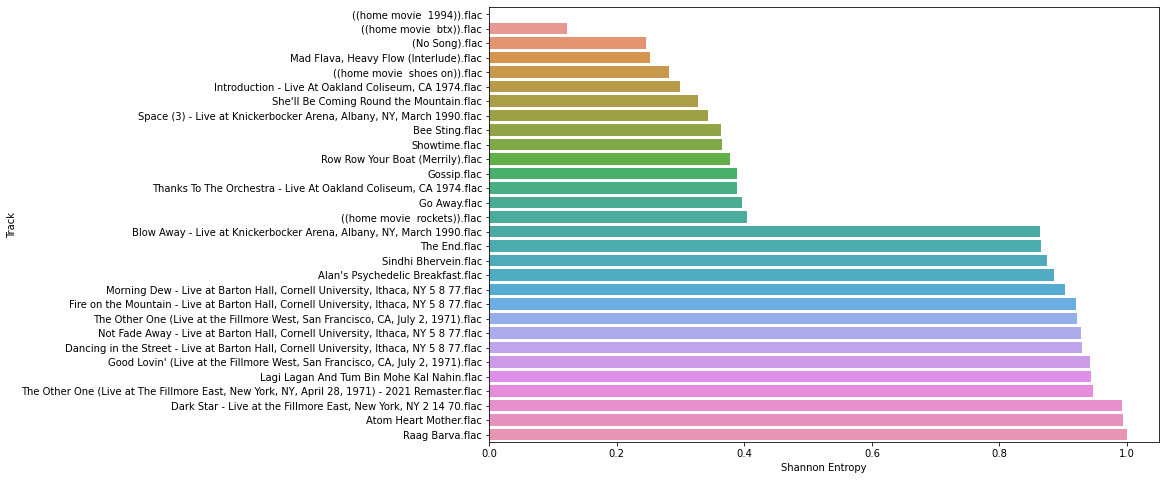

In [10]:
tailPlot("Shannon Entropy","Track", 15)

#### We see 8 songs by the Grateful Dead and Dark Star Orchestra in the top 10 most entropic tracks as measured by Shannon Entropy. Let's take a look at these tracks labeled by album.

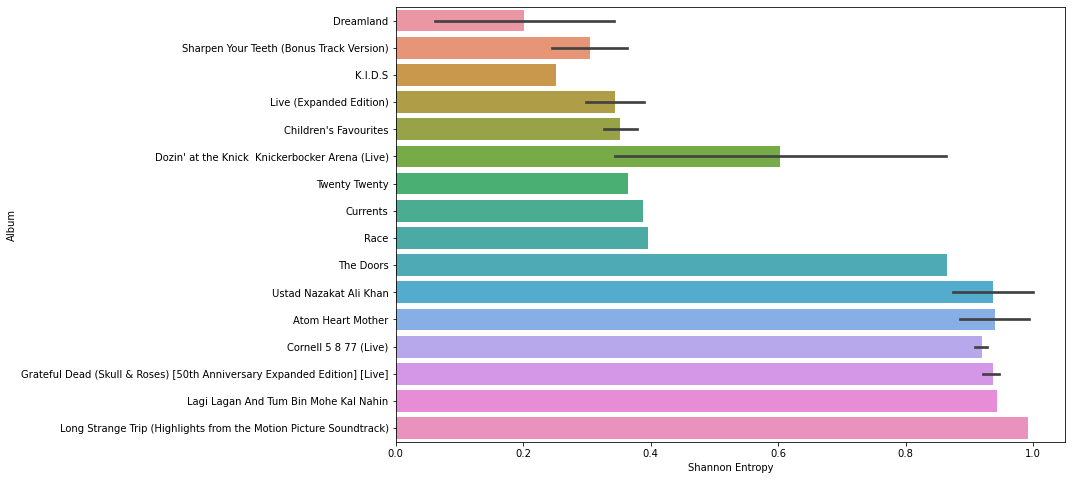

In [11]:
tailPlot("Shannon Entropy","Album", 15)

#### Below are tracks in the distribution tails of the PCA Total Explained Variance (TEV) metric. We hypothesize that the lower total explained variance of those principal components should be "more complex". We see a lot of Grateful Dead and some Queen in the lower TEV tail, and mostly classical music in the upper TEV tail.

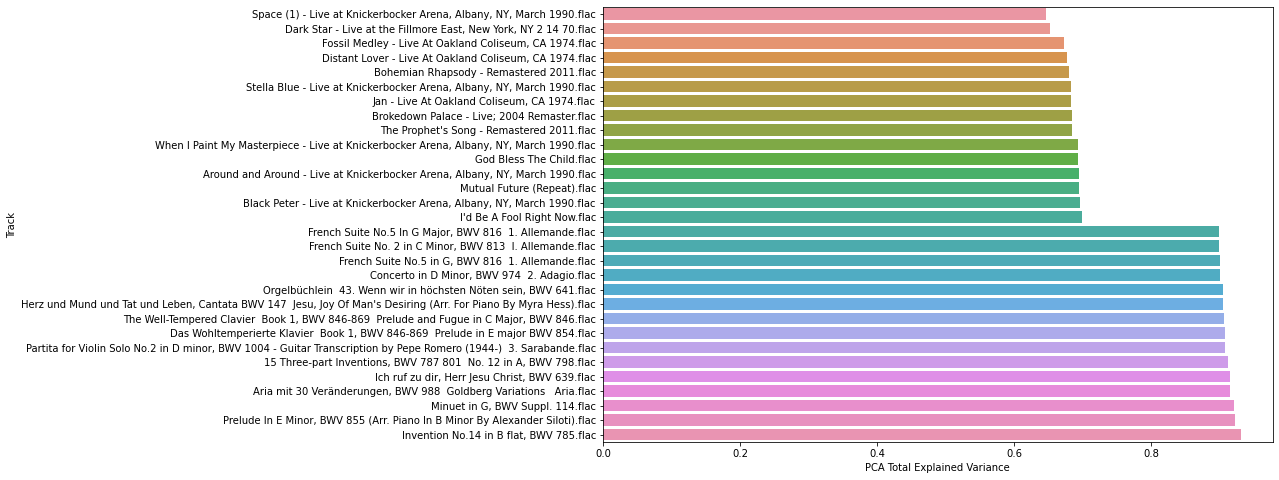

In [12]:
tailPlot("PCA Total Explained Variance","Track", 15)

#### Let's compare the highest and lowest songs with respect to total explained variance. Here are the spectral centroid plots for "Space(1) - Live at the Knickerbocker Arena" (65% TEV) and "Invention No.14 in B flat" (93% TEV). These plots show the change in "center of mass" of a signal over a time domain.

In [13]:
plt.rcParams["figure.figsize"] = (20,3)
print(library.iloc[221])
print("PCA Total Explained Variance", library["PCA Total Explained Variance"].idxmin(), library["PCA Total Explained Variance"].min())
print(library.iloc[297])
print("PCA Total Explained Variance", library["PCA Total Explained Variance"].idxmax(), library["PCA Total Explained Variance"].max());

Artist                                                              Grateful Dead
Album                             Dozin' at the Knick  Knickerbocker Arena (Live)
Track                           Space (1) - Live at Knickerbocker Arena, Alban...
Frequency Mean                                                         139.575777
Frequency Variance                                                   22498.541016
Shannon Entropy                                                          0.829043
PCA Total Explained Variance                                             0.646268
Kolmogorov Entropy                                                        0.16753
Multiscale Entropy              [0.040154050877702505, 0.04999719165336647, 0....
MSE Complexity Index                                                      0.14978
Spectral Centroids              [[273.5134263889961, 288.3318809718338, 309.70...
Name: 221, dtype: object
PCA Total Explained Variance 221 0.6462675333023071
Artist               

Text(0.5, 1.0, 'Spectral Centroids of Space (1) - Live at Knickerbocker Arena (65% explained variance, more complex)')

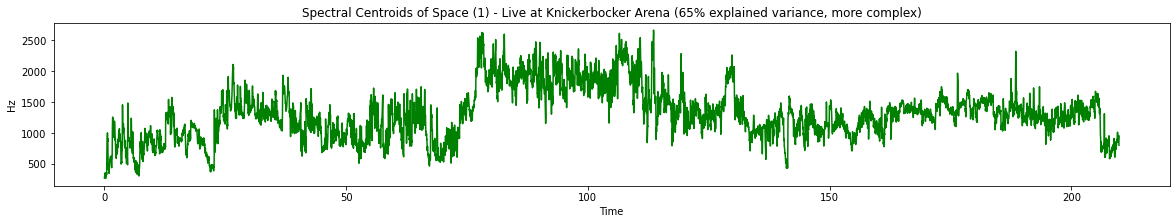

In [14]:
cent = library["Spectral Centroids"][221]
time = librosa.times_like(cent)
fig, ax = plt.subplots()
ax.plot(time, cent.T, color='g')
plt.xlabel("Time")
plt.ylabel("Hz")
plt.title("Spectral Centroids of Space (1) - Live at Knickerbocker Arena (65% explained variance, more complex)")

Text(0.5, 1.0, 'Spectral Centroids of Invention No.14 in B flat, BWV 785 (93% explained variance, less complex)')

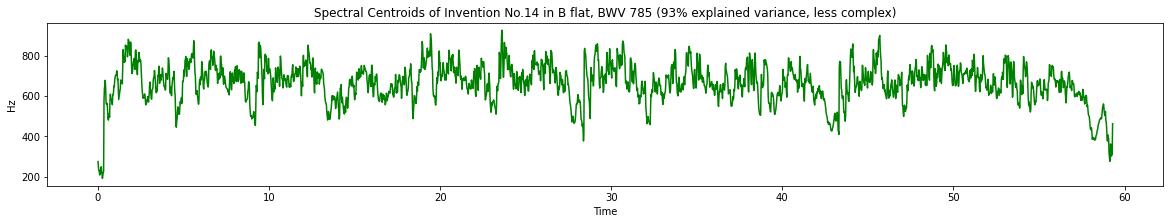

In [15]:
cent = library["Spectral Centroids"][297]
time = librosa.times_like(cent)
fig, ax = plt.subplots()
ax.plot(time, cent.T, color='g')
plt.xlabel("Time")
plt.ylabel("Hz")
plt.title("Spectral Centroids of Invention No.14 in B flat, BWV 785 (93% explained variance, less complex)")

#### Qualitatively, the Grateful Dead track appears to fluctuate more than the classical Bach track. The densities of the plots can be attributed to a fixed plot width for tracks of different time lengths. These spectral centroid plots are helpful to visualize and compare individual tracks over their time domains.

#### Returning to our tail plots, we extract the tails of the Kolmogorov distribution and see an interesting change: a higher density of Grateful Dead music is less entropic, while some classical tracks, Rihanna songs, and the Game of Thrones soundtrack are more entropic. This metric has been used in stochastic systems and chaos theory as a measure of randomness. It will be interesting to compare it with other entropies moving forward.

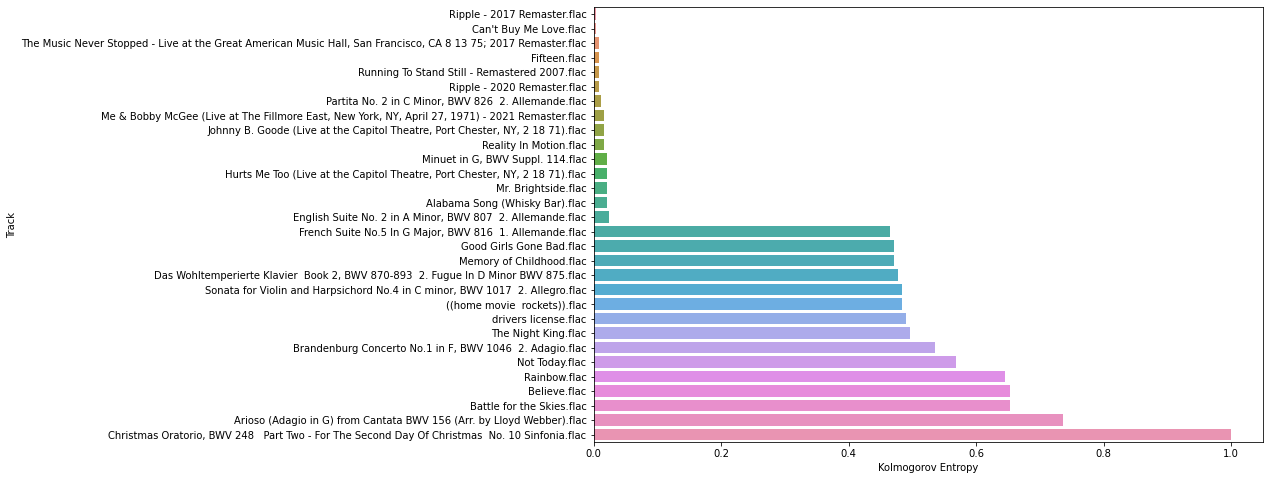

In [16]:
tailPlot("Kolmogorov Entropy","Track", 15)

#### Lastly, the Multiscale Complexity Index by track is shown below. Let's group those 30 tracks by artist.

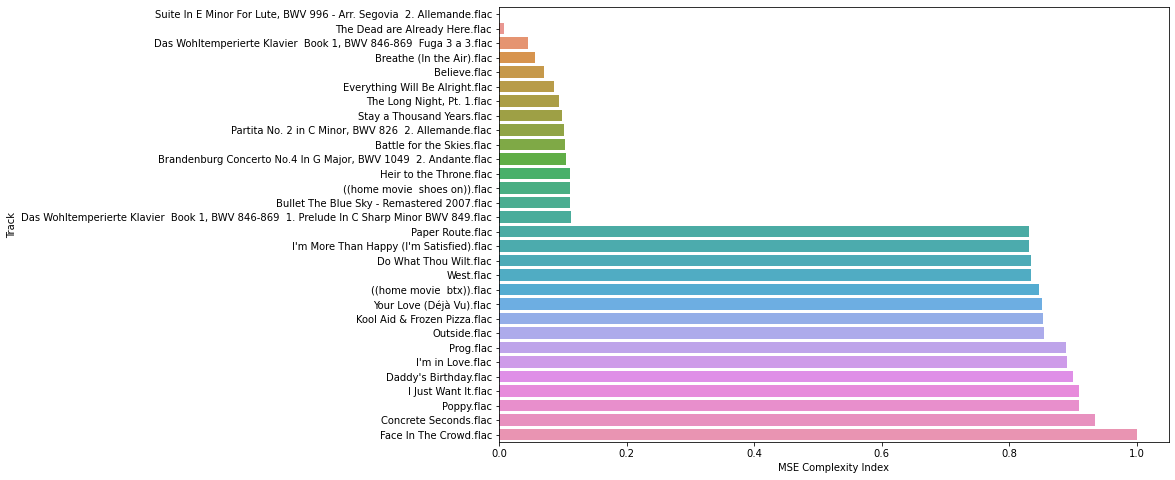

In [17]:
tailPlot("MSE Complexity Index","Track", 15)

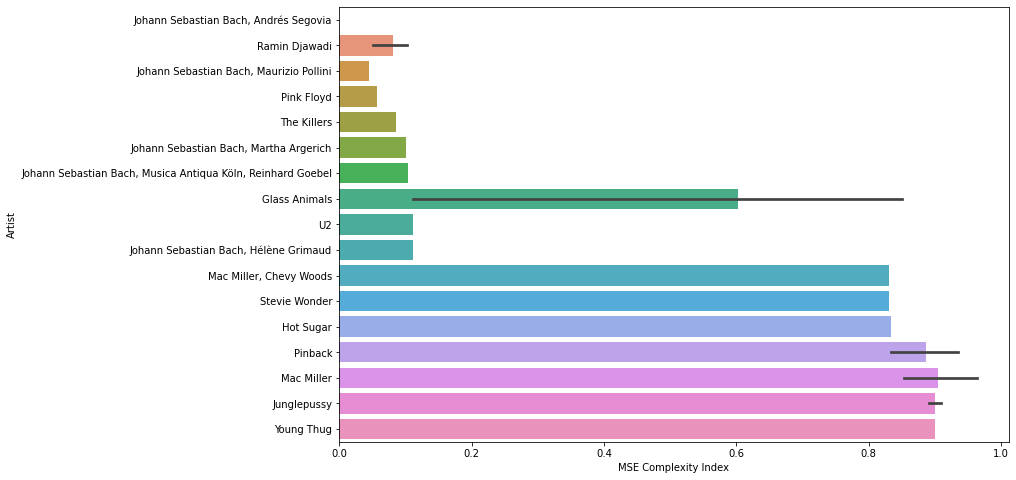

In [18]:
tailPlot("MSE Complexity Index","Artist", 15)

#### Some interesting new players have shown up in the more complex upper tail. Where did the Grateful Dead go? What about Queen, The Doors, and those other artists who exhibited greater Shannon Entropy and less Total Explained Variance? We'll group the entire dataset by artist, calculate the means of some of our metrics and replot to compare grouped data rather than individual tracks.

<AxesSubplot:title={'center':'Kolmogorov Entropy Grouped by Artist'}, ylabel='Artist'>

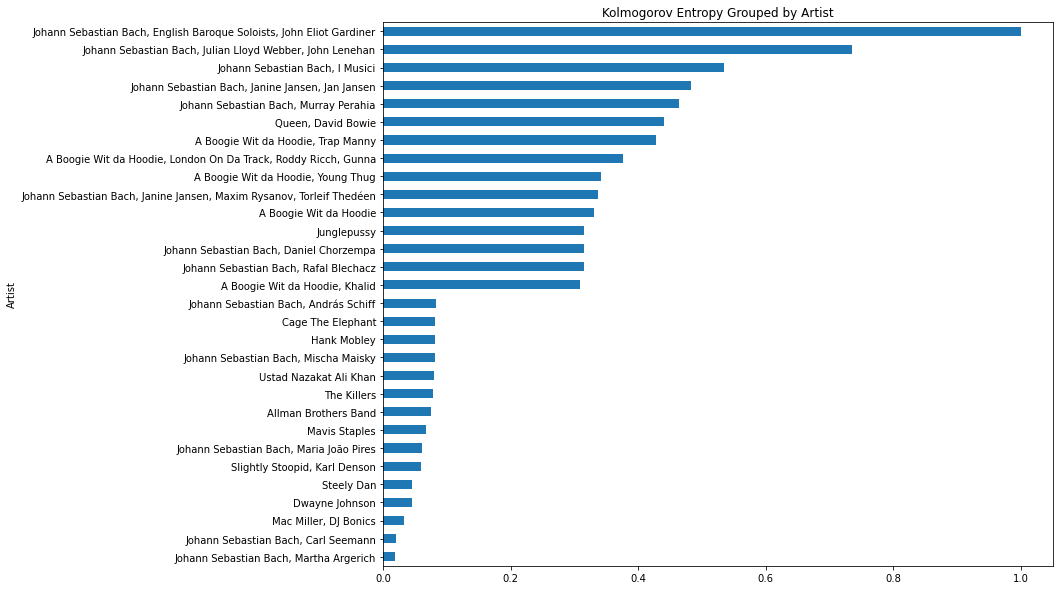

In [19]:
artists = library.groupby(["Artist"]).mean()
top = artists["Kolmogorov Entropy"].sort_values().head(15)
bot = artists["Kolmogorov Entropy"].sort_values().tail(15)
together = pd.concat([top, bot])
together.plot.barh(figsize = (12,10), title = "Mean Kolmogorov Entropy Grouped by Artist")

#### Above we see the 15 most and least entropic artists as measured by mean Kolmogorov Entropy. Note that many of the top 15 are all the same classical collection under different composer names. Below we see the same plot for both MSE Complexity Index and PCA Total Explained Variance.

<AxesSubplot:title={'center':'MSE Complexity Index Grouped by Artist'}, ylabel='Artist'>

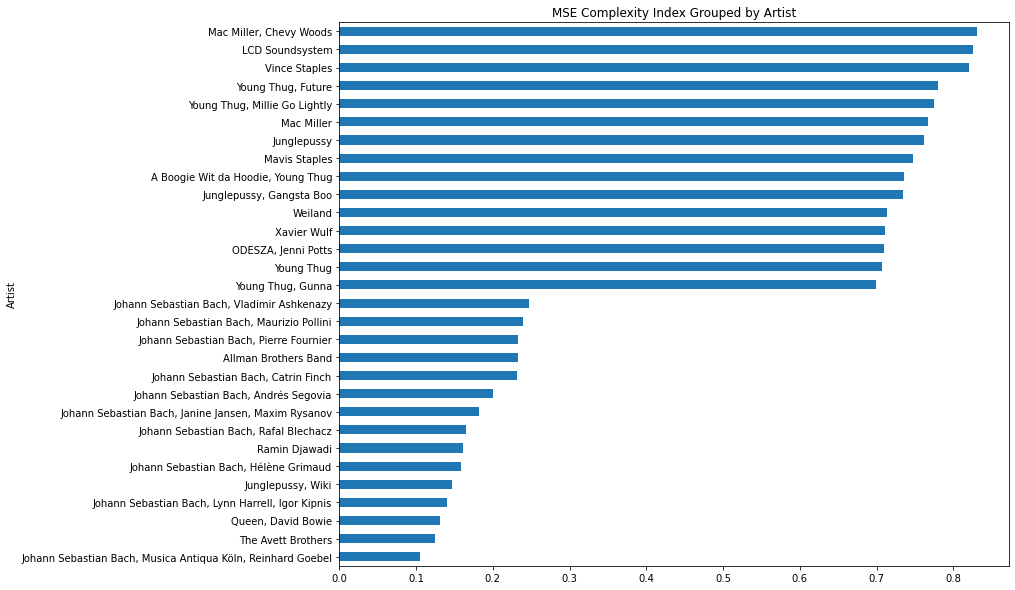

In [20]:
artists = library.groupby(["Artist"]).mean()
top = artists["MSE Complexity Index"].sort_values().head(15)
bot = artists["MSE Complexity Index"].sort_values().tail(15)
together = pd.concat([top, bot])
together.plot.barh(figsize = (12,10), title = "Mean MSE Complexity Index Grouped by Artist")

<AxesSubplot:title={'center':'PCA TEV Grouped by Artist'}, ylabel='Artist'>

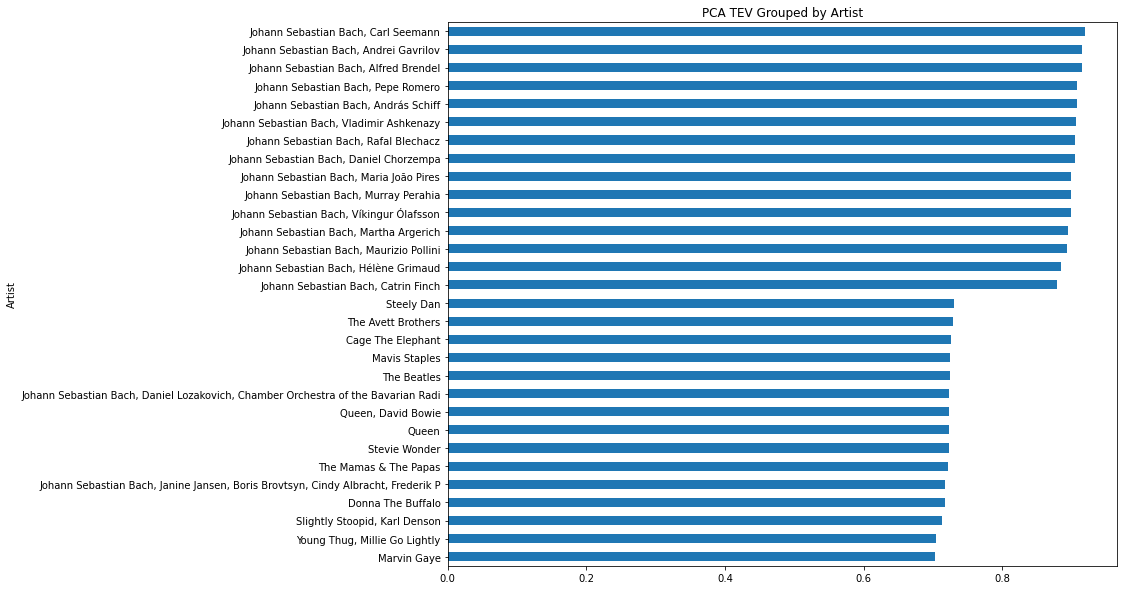

In [21]:
artists = library.groupby(["Artist"]).mean()
top = artists["PCA Total Explained Variance"].sort_values().head(15)
bot = artists["PCA Total Explained Variance"].sort_values().tail(15)
together = pd.concat([top, bot])
together.plot.barh(figsize = (12,10), title = "Mean PCA TEV Grouped by Artist")

#### We see that our hypothesized Total Explained Variance metric seems to align well with the EntropyHub Complexity Index with respect to the outer tails of the distribution. Let's see how well the grouped means correlate for all of the metrics. Note that a correlation of -1 would be optimal given that we hypothesize lower TEV is more complex.

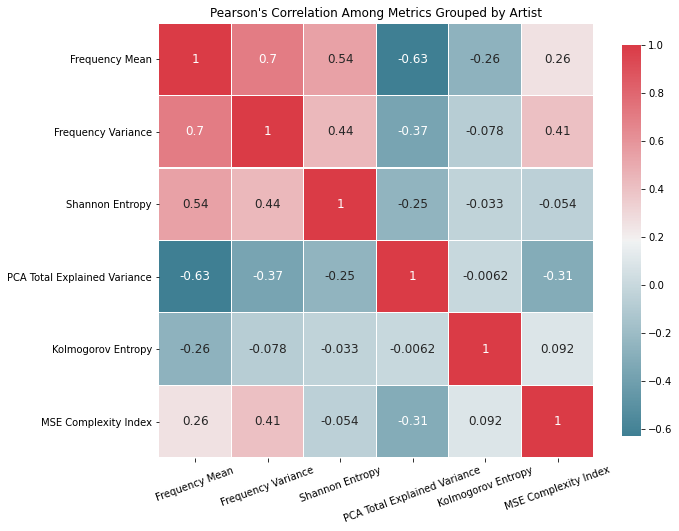

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
        artists.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }),
plt.xticks(rotation = 20)
plt.title("Pearson's Correlation Among Metrics Grouped by Artist")
plt.show()

#### There is no notable increase in correlation when the artists are grouped versus when they are not. 

#### Finally, we will run a K-Means clustering algorithm to examine how an unsupervised learning algorithm groups the tracks.

In [36]:
sse = []
clust = library.drop(columns = ["Track", "Album", "Artist", "Spectral Centroids", "Multiscale Entropy"])
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clust)
    sse.append(kmeans.inertia_)

C:\Users\nicka\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


#### Here we use the elbow method to determine the optimal number of clusters for this dataset: 5

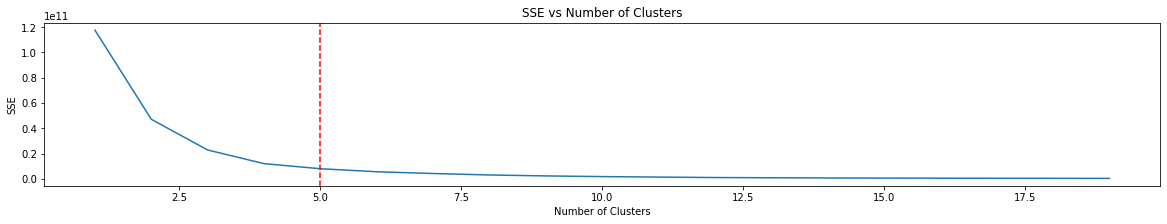

In [37]:
plt.plot(range(1, 20), sse)
plt.axvline(5, linestyle='--', c='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('SSE vs Number of Clusters')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=5, random_state=30)
labels = kmeans.fit_predict(clust)
clust['label_kmean'] = labels

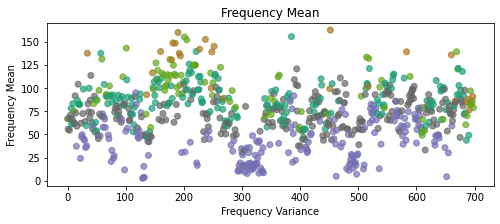

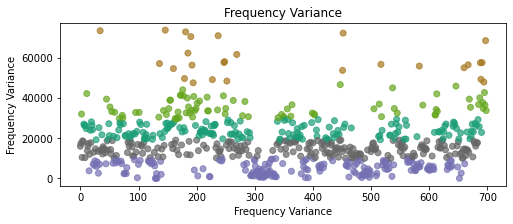

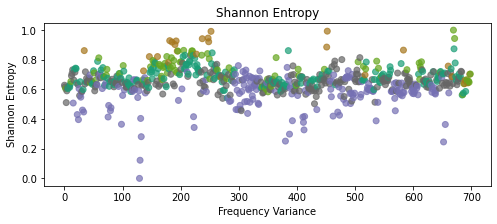

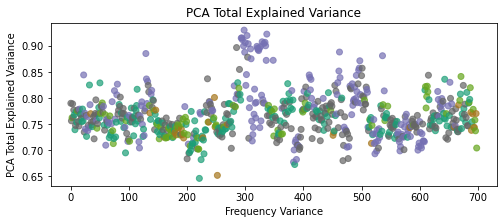

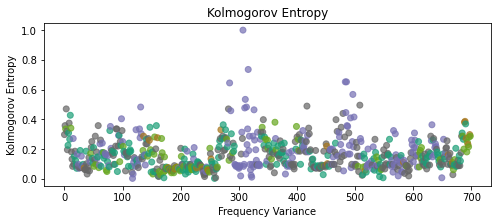

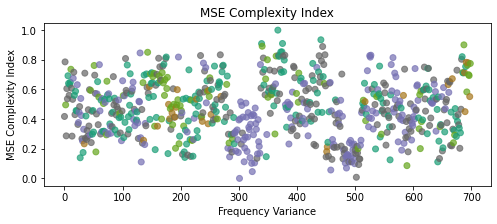

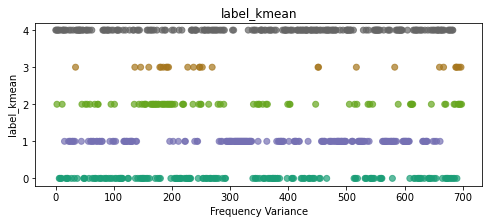

In [39]:
comp = "Frequency Variance"
for col in clust.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    scatter = plt.scatter(clust.index, clust[col], c=labels, cmap=plt.get_cmap('Dark2'), alpha=0.7)
    plt.title(col)
    plt.xlabel(comp)
    plt.ylabel(col)
    plt.show()

#### We plot each of the columns in the metrics dataset with respect to Frequency Variance, labeled by the K-Means clusters. Cluster number 1 (purple) appears to have a higher Total Explained Variance while maintaining a lower MSE Complexity Index, which aligns with our hypothesis. Cluster number 0 (darker green) seems to have a relatively low TEV and a higher MSE Complexity Index. Let's take a look inside our clusters to extract the means of each metric.

In [40]:
cluster_map = pd.DataFrame()
cluster_map["Index"] = clust.index.values
cluster_map["Cluster"] = kmeans.labels_
cluster_map["Track"] = [library["Track"][x] for x in cluster_map["Index"]]
cluster_map["Artist"] = [library["Artist"][x] for x in cluster_map["Index"]]
cluster_map["PCA Total Explained Variance"] = [library["PCA Total Explained Variance"][x] for x in cluster_map["Index"]]
cluster_map["MSE Complexity Index"] = [library["MSE Complexity Index"][x] for x in cluster_map["Index"]]
cluster_map["Shannon Entropy"] = [library["Shannon Entropy"][x] for x in cluster_map["Index"]]
cluster_map[cluster_map["Cluster"] == 0].mean()

Index                           323.121387
Cluster                           0.000000
PCA Total Explained Variance      0.757338
MSE Complexity Index              0.502718
Shannon Entropy                   0.684216
dtype: float64

In [41]:
cluster_map[cluster_map["Cluster"] == 1].mean()

Index                           373.207254
Cluster                           1.000000
PCA Total Explained Variance      0.785885
MSE Complexity Index              0.407517
Shannon Entropy                   0.571181
dtype: float64

In [42]:
cluster_map[cluster_map["Cluster"] == 2].mean()

Index                           317.024691
Cluster                           2.000000
PCA Total Explained Variance      0.758066
MSE Complexity Index              0.524137
Shannon Entropy                   0.734387
dtype: float64

In [43]:
cluster_map[cluster_map["Cluster"] == 3].mean()

Index                           365.407407
Cluster                           3.000000
PCA Total Explained Variance      0.745105
MSE Complexity Index              0.489435
Shannon Entropy                   0.817021
dtype: float64

In [44]:
cluster_map[cluster_map["Cluster"] == 4].mean()

Index                           357.950893
Cluster                           4.000000
PCA Total Explained Variance      0.762258
MSE Complexity Index              0.469893
Shannon Entropy                   0.650248
dtype: float64

#### Cluster #3 shows the highest mean Shannon Entropy and the lowest Total Explained Variance. It is the median MSE Complexity Index among the clusters. Let's look inside:

In [45]:
cluster_map[cluster_map["Cluster"] == 3]

,Index,Cluster,Track,Artist,PCA Total Explained Variance,MSE Complexity Index,Shannon Entropy
34,34,3,Blue Sky - Live.flac,Allman Brothers Band,0.770306,0.232890,0.861941
136,136,3,Helium.flac,Glass Animals,0.771447,0.256902,0.725146
146,146,3,Not Fade Away Goin' Down the Road Feeling Ba...,Grateful Dead,0.777190,0.618728,0.821479
160,160,3,"Hard To Handle (Live at the Capitol Theatre, P...",Grateful Dead,0.725410,0.352244,0.821782
179,179,3,"Wharf Rat (Live at the Capitol Theatre, Port C...",Grateful Dead,0.734035,0.499304,0.781136
181,181,3,"Dancing in the Street - Live at Barton Hall, C...",Grateful Dead,0.729632,0.401645,0.928929
185,185,3,"Fire on the Mountain - Live at Barton Hall, Co...",Grateful Dead,0.742713,0.441785,0.919200
190,190,3,"Morning Dew - Live at Barton Hall, Cornell Uni...",Grateful Dead,0.740835,0.414185,0.902355
192,192,3,"Not Fade Away - Live at Barton Hall, Cornell U...",Grateful Dead,0.729807,0.479853,0.927171
194,194,3,"Row Jimmy - Live at Barton Hall, Cornell Unive...",Grateful Dead,0.723649,0.598409,0.858458


#### This is quite the playlist in the making! An interesting combination of the Grateful Dead, Pink Floyd, Young Thug, and others.

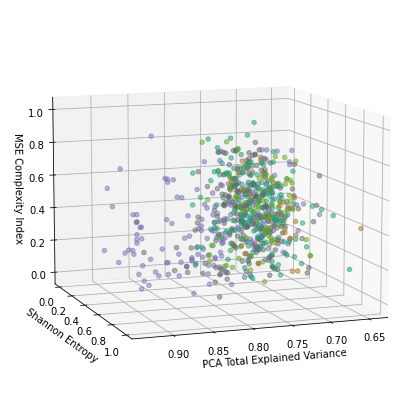

In [46]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.scatter3D(clust['PCA Total Explained Variance'], clust['Shannon Entropy'], clust['MSE Complexity Index'], c=clust["label_kmean"], alpha=0.5, cmap=plt.get_cmap('Dark2'))
ax.set_xlabel('PCA Total Explained Variance')
ax.set_ylabel('Shannon Entropy')
ax.set_zlabel('MSE Complexity Index')
ax.view_init(10, 70)
plt.show()

#### Lastly, we have a 3-dimensional plot labeled by our 5 clusters showing PCA TEV, Shannon Entropy, and the MSE Complexity Index. The plot is somewhat muddled from most angles, except from the one below, in which we can observe a relatively clear difference between cluster 1 (purple) and the other 4. Let's take a peak inside that cluster: we see 193 tracks of a diverse set of artists and genres. This cluster has highest TEV among clusters of 78.5+%.

In [47]:
cluster_map[cluster_map["Cluster"] == 1]

,Index,Cluster,Track,Artist,PCA Total Explained Variance,MSE Complexity Index,Shannon Entropy
15,15,1,Mangalayam.flac,"A.R. Rahman, KK, Shaan, Gulzar",0.779029,0.675276,0.508153
22,22,1,Cross Country.flac,Alex G,0.844465,0.631997,0.430430
24,24,1,Go Away.flac,Alex G,0.771141,0.376538,0.396475
25,25,1,House.flac,Alex G,0.740938,0.447522,0.605349
28,28,1,Remember.flac,Alex G,0.764669,0.539073,0.547656
...,...,...,...,...,...,...,...
638,639,1,Waiting Around to Die.flac,Townes Van Zandt,0.788639,0.318347,0.593585
648,649,1,Running To Stand Still - Remastered 2007.flac,U2,0.785106,0.551659,0.678670
651,652,1,(No Song).flac,Ugly Casanova,0.830321,0.612488,0.245807
654,655,1,Bee Sting.flac,Ugly Casanova,0.788952,0.470305,0.363678


#### We see that many of the metrics produce different, sometimes contradictory results. Our PCA Total Explained Variance metric is an intriguing option for measuring pattern prevalence along the frequency/time domains, and its lack of correlation with Shannon Entropy and especially Multiscale Entropy Complexity Index (more established in measuring the complexity of patterns within a system) implies a need for tuning and refining the metric.

#### The K-Means clustering process allows us to examine some clustering beyond our own metric comparisons, and reveals some interesting relationships between metrics and artists. It acts as an appropriate transition into discussing some potential paths for future study, as one could implement more unsupervised methods to extract audio features and complexity.

### Methods Limitations & Next Steps

Extracting frequency spectra via Fourier Transforms and feature engineering these hypothesized metrics of complexity provides us with an initial window into the audio structure of these tracks. With that said, we haven't directly examined harmonics, percussive sounds, beat, tempo, and other characteristics. We see above that many metrics such as MSE Complexity Index and Shannon Entropy used for measuring complexity/entropy produce different, and even contradictory results. Given the inherent differences in audio recording technology and setting (live music, studio recording, classical concert recording, etc.), it is difficult to differentiate a possibly complex track from one with many changes in the dynamics.

With that, here are two possible approaches to take a deeper look at this music using machine learning. 

1. The first of which would continue feature engineering by generating spectrograms from each track and feeding a neural network to perform onset detection, which extracts the onset of each note and/or percussive sound in the track. From this neural network we can implement many of Python package librosa's features to learn more about the beat, tempo, harmonic structure, etc.
2. A second approach involves using unsupervised deep learning to detect harmonics, percussion. Deep learning studies on music have been done feeding convolutional neural networks, support vector machines, and other models both raw audio data as well as spectral centroids and spectral flux measurements, which librosa is capable of generating. Additionally, one could feed a model the onset results described in approach #1 to compare the unsupervised results with those of a deep learning process.